In [159]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import pylab
from pylab import rcParams
import statsmodels.api as sm
import statistics
from scipy import stats
import sklearn
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

df = pd.read_csv('medical_clean.csv', index_col='CaseOrder')
df

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,4762,Urban,America/New_York,"Programmer, multimedia",2,25,45967.61,Widowed,Male,No,16.980860,4,2,1,No,Emergency Admission,Yes,No,Medium,No,No,No,No,No,Yes,No,Yes,No,Intravenous,51.561220,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,1251,Urban,America/New_York,"Restaurant manager, fast food",4,87,14983.02,Widowed,Male,Yes,18.177020,5,0,0,No,Elective Admission,Yes,No,Medium,Yes,Yes,Yes,No,No,No,No,No,Yes,CT Scan,68.668240,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,Rural,America/Chicago,"Psychologist, occupational",3,45,65917.81,Separated,Female,Yes,17.129070,4,2,0,Yes,Elective Admission,Yes,No,High,Yes,No,No,No,No,Yes,Yes,No,No,Intravenous,70.154180,8276.481000,15281.210000,3,3,3,4,4,2,3,2


In [160]:
df.rename(columns={'Item1':'Timely_admis','Item2':'Timely_treat','Item3':'Timely_visits','Item4':'Reliability','Item5':'Options','Item6':'Hrs_treat','Item7':'Courteous','Item8':'Active_listen'},inplace=True)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Mari

In [162]:
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Timely_admis,Timely_treat,Timely_visits,Reliability,Options,Hrs_treat,Courteous,Active_listen
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [163]:
#check for missing data
df.isna().any()

Customer_id           False
Interaction           False
UID                   False
City                  False
State                 False
County                False
Zip                   False
Lat                   False
Lng                   False
Population            False
Area                  False
TimeZone              False
Job                   False
Children              False
Age                   False
Income                False
Marital               False
Gender                False
ReAdmis               False
VitD_levels           False
Doc_visits            False
Full_meals_eaten      False
vitD_supp             False
Soft_drink            False
Initial_admin         False
HighBlood             False
Stroke                False
Complication_risk     False
Overweight            False
Arthritis             False
Diabetes              False
Hyperlipidemia        False
BackPain              False
Anxiety               False
Allergic_rhinitis     False
Reflux_esophagitis  

In [164]:
#check for duplicate data in columns
df[df.duplicated()]

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Timely_admis,Timely_treat,Timely_visits,Reliability,Options,Hrs_treat,Courteous,Active_listen
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [165]:
#checking for duplicated columns 
df.columns.duplicated().any()

False

In [166]:
#checking for Duplicate rows
df.duplicated().any()

False

In [167]:
#Dropping the demographic data, dropped Initial days only to readd so its at the end of the table to make it easier to do the backwards steps
initialDays=df['Initial_days']
df = df.drop(['Customer_id','Interaction','UID','City','State','County','Zip','Lat','Lng','Population','Area','TimeZone','Job', 'Initial_days'], axis=1)
df['Initial_days'] = initialDays

In [168]:
#validate columns went away
df.head()

,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,TotalCharge,Additional_charges,Timely_admis,Timely_treat,Timely_visits,Reliability,Options,Hrs_treat,Courteous,Active_listen,Initial_days
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,3726.702860,17939.403420,3,3,2,2,4,3,3,4,10.585770
2,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,4193.190458,17612.998120,3,4,3,4,4,4,3,3,15.129562
3,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,2434.234222,17505.192460,2,4,4,4,3,4,3,3,4.772177
4,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,2127.830423,12993.437350,3,5,5,3,4,5,5,5,1.714879
5,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,2113.073274,3716.525786,2,1,3,3,5,3,4,3,1.254807


In [169]:
#data columns converted from yes/no to 0/1
df = df.replace({'Yes':1, 'No':0})
df

,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,TotalCharge,Additional_charges,Timely_admis,Timely_treat,Timely_visits,Reliability,Options,Hrs_treat,Courteous,Active_listen,Initial_days
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,53,86575.93,Divorced,Male,0,19.141466,6,0,0,0,Emergency Admission,1,0,Medium,0,1,1,0,1,1,1,0,1,Blood Work,3726.702860,17939.403420,3,3,2,2,4,3,3,4,10.585770
2,3,51,46805.99,Married,Female,0,18.940352,4,2,1,0,Emergency Admission,1,0,High,1,0,0,0,0,0,0,1,0,Intravenous,4193.190458,17612.998120,3,4,3,4,4,4,3,3,15.129562
3,3,53,14370.14,Widowed,Female,0,18.057507,4,1,0,0,Elective Admission,1,0,Medium,1,0,1,0,0,0,0,0,0,Blood Work,2434.234222,17505.192460,2,4,4,4,3,4,3,3,4.772177
4,0,78,39741.49,Married,Male,0,16.576858,4,1,0,0,Elective Admission,0,1,Medium,0,1,0,0,0,0,0,1,1,Blood Work,2127.830423,12993.437350,3,5,5,3,4,5,5,5,1.714879
5,1,22,1209.56,Widowed,Female,0,17.439069,5,0,2,1,Elective Admission,0,0,Low,0,0,0,1,0,0,1,0,0,CT Scan,2113.073274,3716.525786,2,1,3,3,5,3,4,3,1.254807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2,25,45967.61,Widowed,Male,0,16.980860,4,2,1,0,Emergency Admission,1,0,Medium,0,0,0,0,0,1,0,1,0,Intravenous,6850.942000,8927.642000,3,2,2,3,4,3,4,2,51.561220
9997,4,87,14983.02,Widowed,Male,1,18.177020,5,0,0,0,Elective Admission,1,0,Medium,1,1,1,0,0,0,0,0,1,CT Scan,7741.690000,28507.150000,3,3,4,2,5,3,4,4,68.668240
9998,3,45,65917.81,Separated,Female,1,17.129070,4,2,0,1,Elective Admission,1,0,High,1,0,0,0,0,1,1,0,0,Intravenous,8276.481000,15281.210000,3,3,3,4,4,2,3,2,70.154180


In [170]:
#Update Genders to numbers
df['Gender'] = df['Gender'].replace(['Male','Female','Nonbinary'],[1,2,3])

In [171]:
#update marital status to numberical data
df['Marital'] = df['Marital'].replace(['Divorced','Widowed','Separated','Never Married'],'NotMarried')
df['Marital'] = df['Marital'].replace(['Married','NotMarried'],[1,0])

In [172]:
#Convert Services, initial admin and Complication Risk
df['Services'].replace(['Blood Work', 'Intravenous', 'CT Scan', 'MRI'],[1,2,3,4], inplace=True)
df['Initial_admin'].replace(['Emergency Admission', 'Elective Admission', 'Observation Admission'], [3,2,1], inplace=True)
df['Complication_risk'].replace(['Low', 'Medium', 'High'], [1,2,3], inplace=True)
df.head()

,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,TotalCharge,Additional_charges,Timely_admis,Timely_treat,Timely_visits,Reliability,Options,Hrs_treat,Courteous,Active_listen,Initial_days
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,53,86575.93,0,1,0,19.141466,6,0,0,0,3,1,0,2,0,1,1,0,1,1,1,0,1,1,3726.702860,17939.403420,3,3,2,2,4,3,3,4,10.585770
2,3,51,46805.99,1,2,0,18.940352,4,2,1,0,3,1,0,3,1,0,0,0,0,0,0,1,0,2,4193.190458,17612.998120,3,4,3,4,4,4,3,3,15.129562
3,3,53,14370.14,0,2,0,18.057507,4,1,0,0,2,1,0,2,1,0,1,0,0,0,0,0,0,1,2434.234222,17505.192460,2,4,4,4,3,4,3,3,4.772177
4,0,78,39741.49,1,1,0,16.576858,4,1,0,0,2,0,1,2,0,1,0,0,0,0,0,1,1,1,2127.830423,12993.437350,3,5,5,3,4,5,5,5,1.714879
5,1,22,1209.56,0,2,0,17.439069,5,0,2,1,2,0,0,1,0,0,0,1,0,0,1,0,0,3,2113.073274,3716.525786,2,1,3,3,5,3,4,3,1.254807


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Children            10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Income              10000 non-null  float64
 3   Marital             10000 non-null  int64  
 4   Gender              10000 non-null  int64  
 5   ReAdmis             10000 non-null  int64  
 6   VitD_levels         10000 non-null  float64
 7   Doc_visits          10000 non-null  int64  
 8   Full_meals_eaten    10000 non-null  int64  
 9   vitD_supp           10000 non-null  int64  
 10  Soft_drink          10000 non-null  int64  
 11  Initial_admin       10000 non-null  int64  
 12  HighBlood           10000 non-null  int64  
 13  Stroke              10000 non-null  int64  
 14  Complication_risk   10000 non-null  int64  
 15  Overweight          10000 non-null  int64  
 16  Arth

In [174]:
df.describe()

,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,TotalCharge,Additional_charges,Timely_admis,Timely_treat,Timely_visits,Reliability,Options,Hrs_treat,Courteous,Active_listen,Initial_days
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.097200,53.511700,40490.495160,0.202300,1.544600,0.366900,17.964262,5.012200,1.001400,0.398900,0.257500,2.262400,0.409000,0.199300,2.123300,0.709400,0.357400,0.27380,0.337200,0.411400,0.321500,0.394100,0.413500,0.28930,1.672000,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700,34.455299
std,2.163659,20.638538,28521.153293,0.401735,0.539296,0.481983,2.017231,1.045734,1.008117,0.628505,0.437279,0.825115,0.491674,0.399494,0.730172,0.454062,0.479258,0.44593,0.472777,0.492112,0.467076,0.488681,0.492486,0.45346,0.832758,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312,26.309341
min,0.000000,18.000000,154.080000,0.000000,1.000000,0.000000,9.806483,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.001981
25%,0.000000,36.000000,19598.775000,0.000000,1.000000,0.000000,16.626439,4.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,7.896215
50%,1.000000,53.000000,33768.420000,0.000000,2.000000,0.000000,17.951122,5.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,35.836244
75%,3.000000,71.000000,54296.402500,0.000000,2.000000,1.000000,19.347963,6.000000,2.000000,1.000000,1.000000,3.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,2.000000,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,61.161020
max,10.000000,89.000000,207249.100000,1.000000,3.000000,1.000000,26.394449,9.000000,7.000000,5.000000,1.000000,3.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,4.000000,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000,71.981490


In [175]:
d_list=df.columns.values.tolist()
print(d_list)

['Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services', 'TotalCharge', 'Additional_charges', 'Timely_admis', 'Timely_treat', 'Timely_visits', 'Reliability', 'Options', 'Hrs_treat', 'Courteous', 'Active_listen', 'Initial_days']


In [176]:
#export Data CSV
df.to_csv('medical_clean_update.csv')

In [177]:
#selcting columns for numerical data
NumericalData=df.select_dtypes(include='number').columns
NumericalData

Index(['Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'TotalCharge',
       'Additional_charges', 'Timely_admis', 'Timely_treat', 'Timely_visits',
       'Reliability', 'Options', 'Hrs_treat', 'Courteous', 'Active_listen',
       'Initial_days'],
      dtype='object')

<Figure size 1000x2000 with 0 Axes>

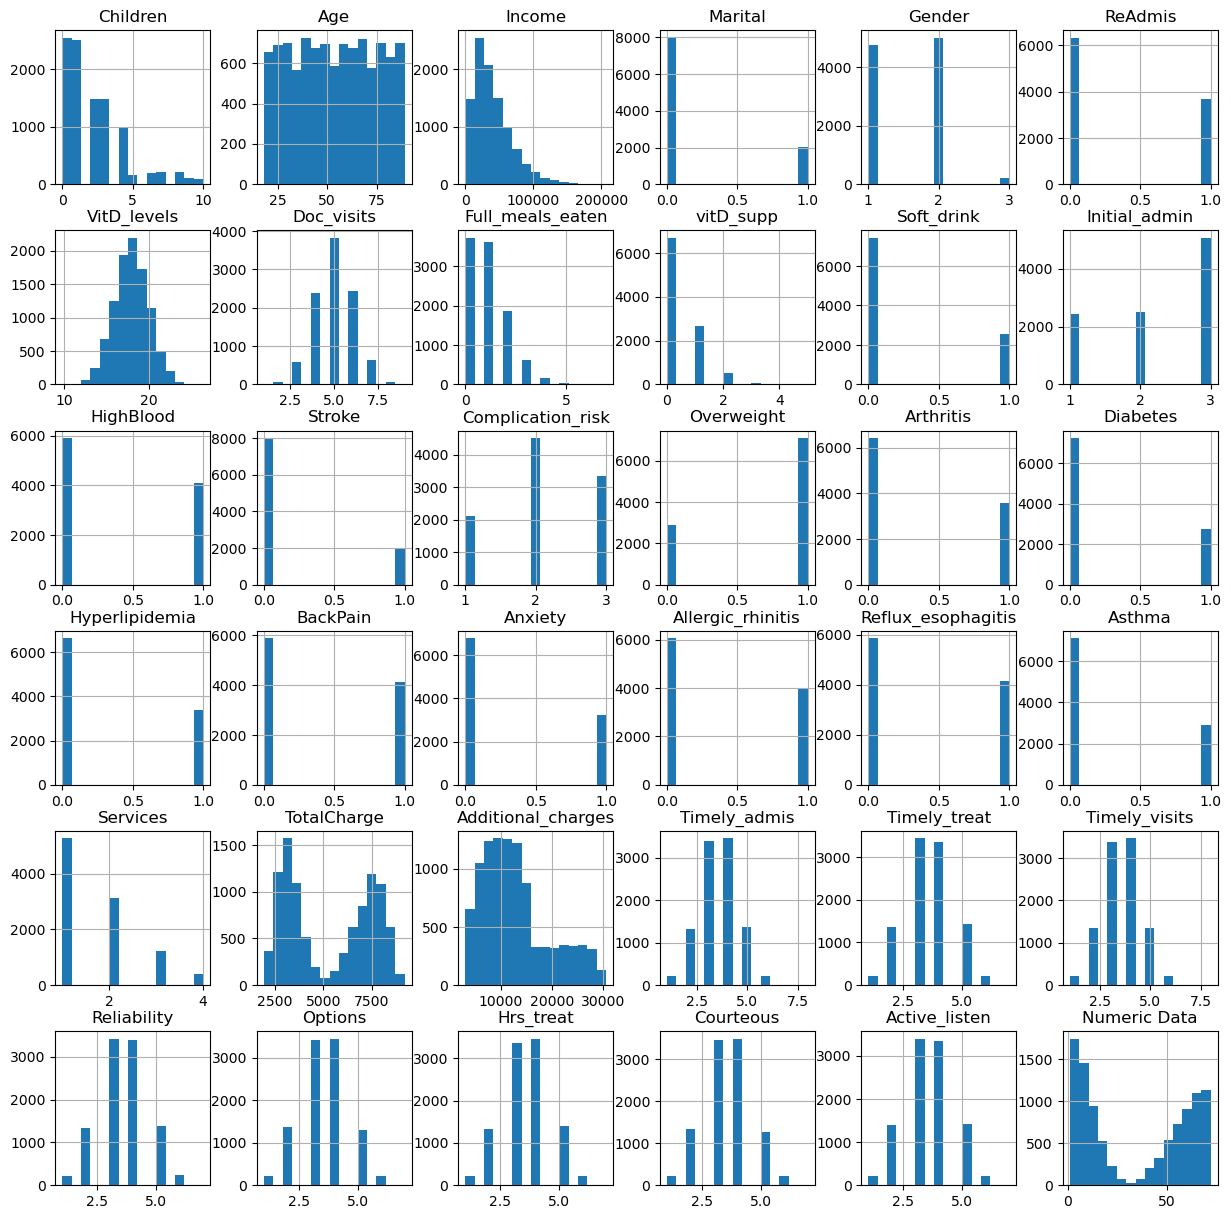

In [178]:
#histogram plots of numeric data, Univariate 
fig=plt.figure(figsize=(10,20))
ax = df[NumericalData].hist(bins=15, figsize=(15,15))
plt.title('Numeric Data')
fig.tight_layout(h_pad=5, w_pad=5)
plt.show()

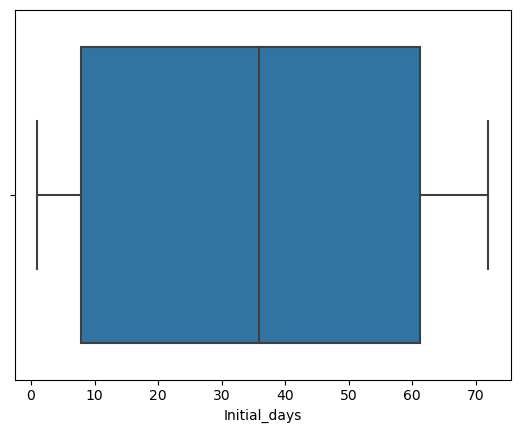

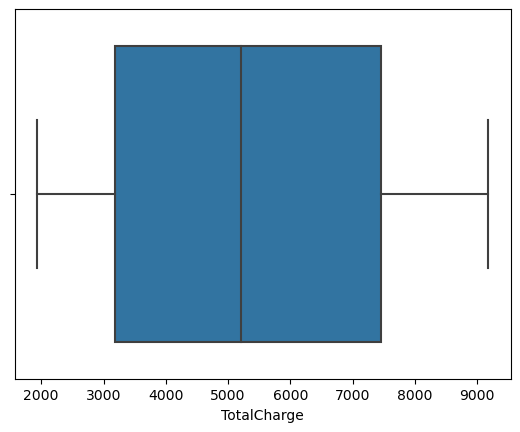

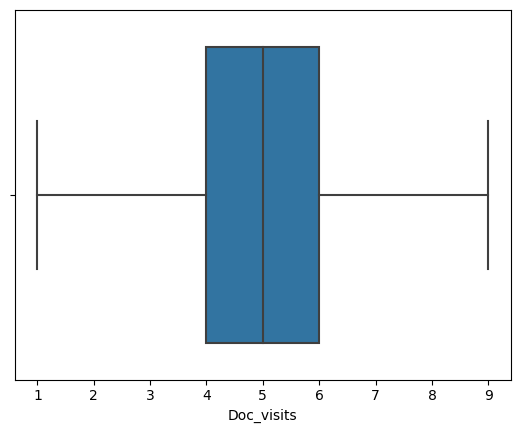

In [179]:
#create boxplots for Cont variables
sns.boxplot(x='Initial_days', data =df)
plt.show();
sns.boxplot(x='TotalCharge', data=df)
plt.show();
sns.boxplot(x='Doc_visits', data=df)
plt.show()



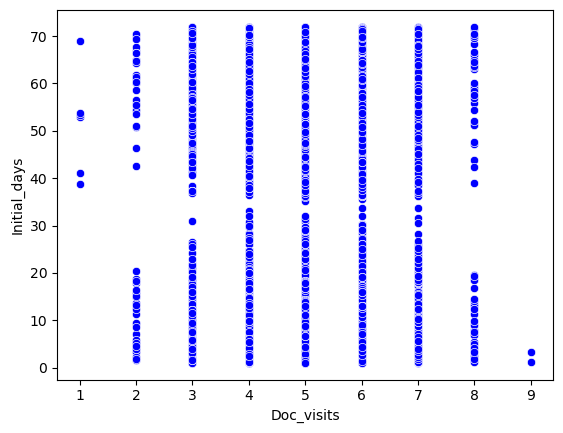

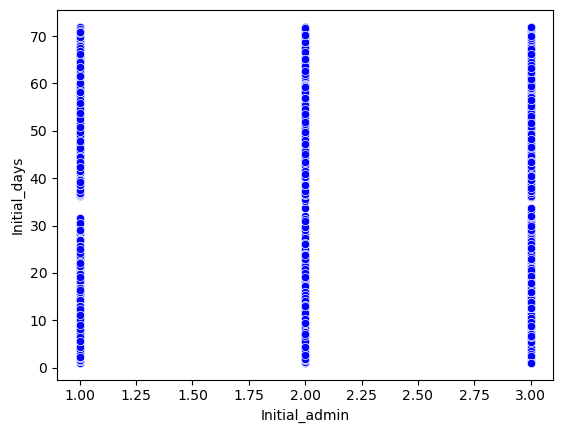

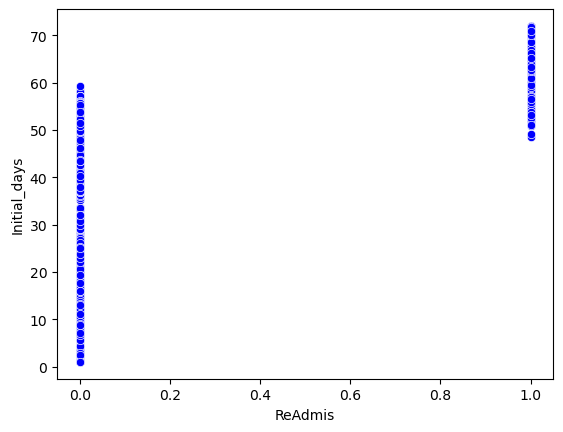

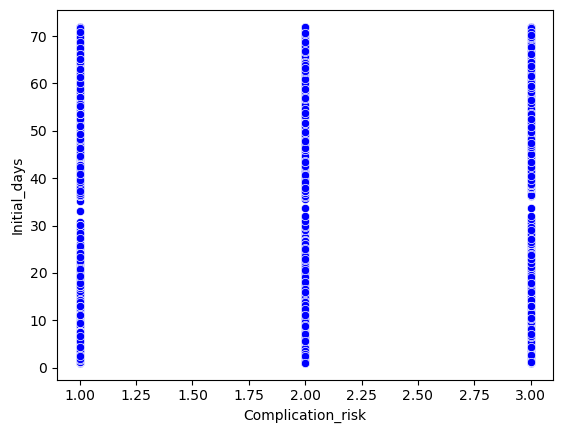

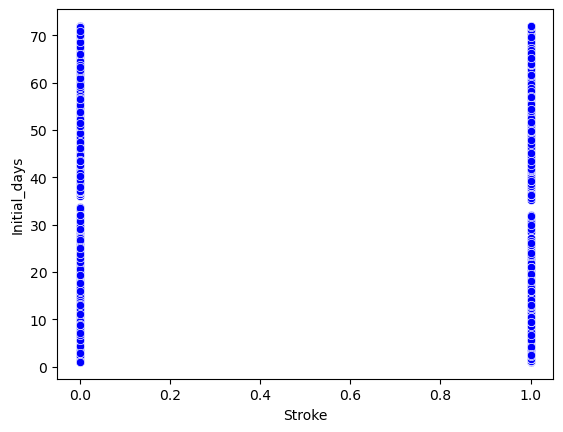

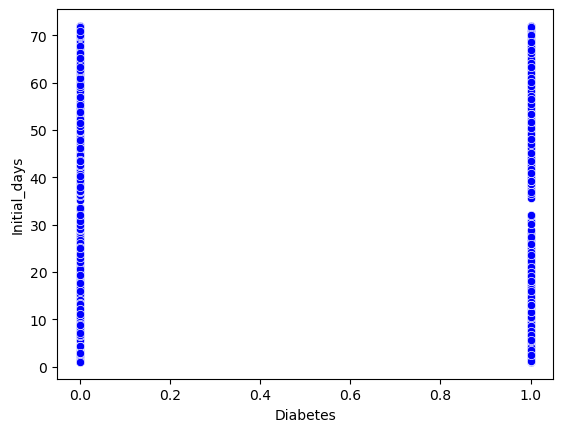

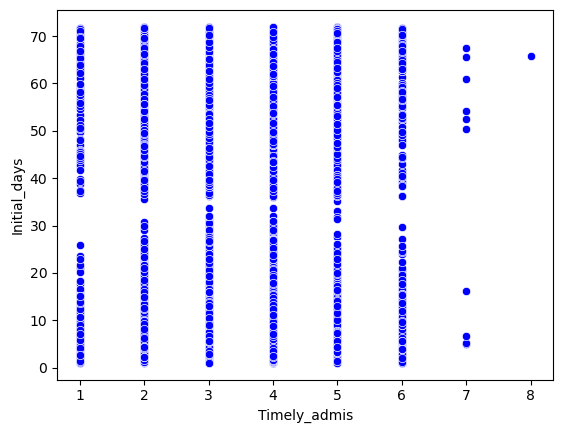

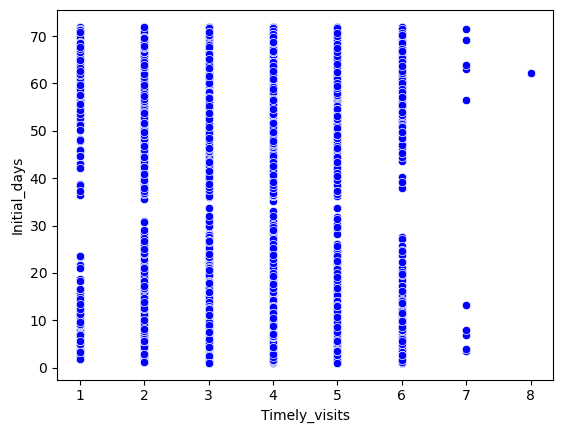

In [180]:
#Create scatterplots to show relationships between target variable and potential predictorvariables
sns.scatterplot(x=df['Doc_visits'],y=df['Initial_days'],color='blue')
plt.show();
sns.scatterplot(x=df['Initial_admin'],y=df['Initial_days'],color='blue')
plt.show();
sns.scatterplot(x=df['ReAdmis'],y=df['Initial_days'],color='blue')
plt.show();
sns.scatterplot(x=df['Complication_risk'],y=df['Initial_days'],color='blue')
plt.show();
sns.scatterplot(x=df['Stroke'],y=df['Initial_days'],color='blue')
plt.show();
sns.scatterplot(x=df['Diabetes'],y=df['Initial_days'],color='blue')
plt.show();
sns.scatterplot(x=df['Timely_admis'],y=df['Initial_days'],color='blue')
plt.show();
sns.scatterplot(x=df['Timely_visits'],y=df['Initial_days'],color='blue')
plt.show();
df['intercept'] = 1

In [181]:
m_initialdays = sm.OLS(df['Initial_days'],df[['Age','ReAdmis', 'Doc_visits', 'Initial_admin', 'HighBlood', 'Stroke','Complication_risk', 'Diabetes','Anxiety', 'Allergic_rhinitis','Reflux_esophagitis', 'Asthma', 'Services', 'TotalCharge','Additional_charges', 'Timely_admis', 'Timely_treat','Hrs_treat','Active_listen','intercept']]).fit()
m_initialdays.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Initial_days   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 9.252e+04
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:06:04   Log-Likelihood:                -21004.
No. Observations:               10000   AIC:                         4.205e+04
Df Residuals:                    9980   BIC:                         4.219e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0145      0.003      4.969      0.000       0.009       0.020
ReAdmis                0.9359      0.078     12.033      0.000       0.783       1.088
Doc_visits            -0.0293      0.019     -1.549      0.121      -0.066       0.008
Initial_admin         -3.3867      0.025   -137.754      0.000      -3.435      -3.339
HighBlood             -0.7628      0.113     -6.781      0.000      -0.983      -0.542
Stroke                 0.0695      0.050      1.397      0.162      -0.028       0.167
Complication_risk     -2.6655      0.028    -96.874      0.000      -2.719      -2.612
Diabetes              -0.8855      0.044    -19.924      0.000      -0.973      -0.798
Anxiety               -1.0211      0.042    -24.053      0.000      -1.104      -0.938
Allergic_rhinitis     -0.7044      0.041    -17.368      0.000      -0.784      -0.625
Reflux_esophagitis    -0.7211      0.040    -17.922      0.000      -0.800      -0.642
Asthma                 0.0302      0.044      0.692      0.489      -0.055       0.116
Services               0.0195      0.024      0.820      0.412      -0.027       0.066
TotalCharge            0.0119   1.73e-05    689.571      0.000       0.012       0.012
Additional_charges -6.469e-05   1.22e-05     -5.316      0.000   -8.85e-05   -4.08e-05
Timely_admis           0.0022      0.026      0.082      0.934      -0.050       0.054
Timely_treat           0.0031      0.026      0.120      0.905      -0.047       0.053
Hrs_treat              0.0082      0.022      0.374      0.708      -0.035       0.051
Active_listen         -0.0069      0.020     -0.336      0.737      -0.047       0.033
intercept            -14.4488      0.186    -77.879      0.000     -14.812     -14.085
==============================================================================
Omnibus:                      274.750   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.128
Skew:                           0.308   Prob(JB):                     2.38e-51
Kurtosis:                       2.575   Cond. No.                     1.47e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [182]:
df.shape

(10000, 37)

In [183]:
X = add_constant(df.drop('Initial_days', axis=1))
y = df['Initial_days']

In [184]:
#Split variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [185]:
lasso = Lasso(alpha=.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [186]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Sqaured Error:', mse)

Mean Sqaured Error: 3.6620638788546698


In [187]:
lasso_coef = pd.DataFrame({'Features': X_train.columns, 'Coeff': lasso.coef_})
lasso_coef

,Features,Coeff
0,Children,-0.000000e+00
1,Age,3.308711e-02
2,Income,2.276424e-07
3,Marital,0.000000e+00
4,Gender,-0.000000e+00
5,ReAdmis,0.000000e+00
6,VitD_levels,0.000000e+00
7,Doc_visits,-0.000000e+00
8,Full_meals_eaten,-0.000000e+00
9,vitD_supp,0.000000e+00


In [188]:
m_initialdays = sm.OLS(df['Initial_days'],df[['Age', 'Income', 'Initial_admin', 'Complication_risk', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'TotalCharge', 'Additional_charges', 'intercept']]).fit()
m_initialdays.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Initial_days   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.624e+05
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:07:50   Log-Likelihood:                -20096.
No. Observations:               10000   AIC:                         4.022e+04
Df Residuals:                    9986   BIC:                         4.032e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0331      0.001     26.282      0.000       0.031       0.036
Income             -4.124e-07   6.34e-07     -0.651      0.515   -1.65e-06     8.3e-07
Initial_admin         -3.3967      0.022   -154.103      0.000      -3.440      -3.354
Complication_risk     -2.7046      0.025   -108.861      0.000      -2.753      -2.656
Arthritis             -0.8393      0.038    -22.240      0.000      -0.913      -0.765
Diabetes              -0.8882      0.041    -21.916      0.000      -0.968      -0.809
Hyperlipidemia        -1.1388      0.038    -29.786      0.000      -1.214      -1.064
BackPain              -1.0952      0.037    -29.789      0.000      -1.167      -1.023
Anxiety               -1.0408      0.039    -26.888      0.000      -1.117      -0.965
Allergic_rhinitis     -0.7250      0.037    -19.601      0.000      -0.798      -0.653
Reflux_esophagitis    -0.7039      0.037    -19.170      0.000      -0.776      -0.632
TotalCharge            0.0121   8.37e-06   1451.659      0.000       0.012       0.012
Additional_charges    -0.0001   3.97e-06    -36.109      0.000      -0.000      -0.000
intercept            -14.2357      0.104   -136.908      0.000     -14.439     -14.032
==============================================================================
Omnibus:                      561.898   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              432.913
Skew:                           0.419   Prob(JB):                     9.87e-95
Kurtosis:                       2.420   Cond. No.                     2.98e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [189]:
#Narrow results, removing diagnosis and survey variables
medical_heatmap = df[['Age', 'Income', 'Initial_admin', 'Complication_risk', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'TotalCharge', 'Additional_charges']]

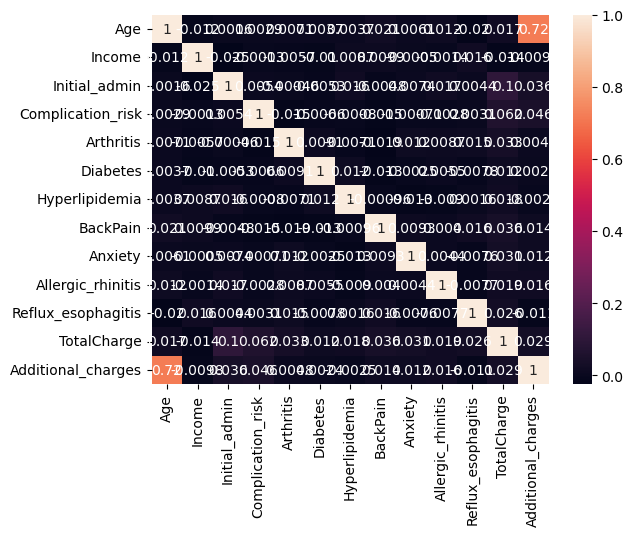

In [190]:
#Reduced Initial model heatmap
sns.heatmap(medical_heatmap.corr(), annot=True)
plt.show()

In [191]:
#Reduced multiple regression model
df['intercept'] = 1
lm_initialdays_reduced = sm.OLS(df['Initial_days'],df[['Age', 'Income', 'Initial_admin', 'Complication_risk', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'TotalCharge', 'Additional_charges', 'intercept']]).fit()
lm_initialdays_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Initial_days   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.624e+05
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:08:16   Log-Likelihood:                -20096.
No. Observations:               10000   AIC:                         4.022e+04
Df Residuals:                    9986   BIC:                         4.032e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0331      0.001     26.282      0.000       0.031       0.036
Income             -4.124e-07   6.34e-07     -0.651      0.515   -1.65e-06     8.3e-07
Initial_admin         -3.3967      0.022   -154.103      0.000      -3.440      -3.354
Complication_risk     -2.7046      0.025   -108.861      0.000      -2.753      -2.656
Arthritis             -0.8393      0.038    -22.240      0.000      -0.913      -0.765
Diabetes              -0.8882      0.041    -21.916      0.000      -0.968      -0.809
Hyperlipidemia        -1.1388      0.038    -29.786      0.000      -1.214      -1.064
BackPain              -1.0952      0.037    -29.789      0.000      -1.167      -1.023
Anxiety               -1.0408      0.039    -26.888      0.000      -1.117      -0.965
Allergic_rhinitis     -0.7250      0.037    -19.601      0.000      -0.798      -0.653
Reflux_esophagitis    -0.7039      0.037    -19.170      0.000      -0.776      -0.632
TotalCharge            0.0121   8.37e-06   1451.659      0.000       0.012       0.012
Additional_charges    -0.0001   3.97e-06    -36.109      0.000      -0.000      -0.000
intercept            -14.2357      0.104   -136.908      0.000     -14.439     -14.032
==============================================================================
Omnibus:                      561.898   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              432.913
Skew:                           0.419   Prob(JB):                     9.87e-95
Kurtosis:                       2.420   Cond. No.                     2.98e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [192]:
#loading clean data for the residual plotting
med_df=pd.read_csv('medical_clean_update.csv')
med_df

,CaseOrder,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,TotalCharge,Additional_charges,Timely_admis,Timely_treat,Timely_visits,Reliability,Options,Hrs_treat,Courteous,Active_listen,Initial_days
0,1,1,53,86575.93,0,1,0,19.141466,6,0,0,0,3,1,0,2,0,1,1,0,1,1,1,0,1,1,3726.702860,17939.403420,3,3,2,2,4,3,3,4,10.585770
1,2,3,51,46805.99,1,2,0,18.940352,4,2,1,0,3,1,0,3,1,0,0,0,0,0,0,1,0,2,4193.190458,17612.998120,3,4,3,4,4,4,3,3,15.129562
2,3,3,53,14370.14,0,2,0,18.057507,4,1,0,0,2,1,0,2,1,0,1,0,0,0,0,0,0,1,2434.234222,17505.192460,2,4,4,4,3,4,3,3,4.772177
3,4,0,78,39741.49,1,1,0,16.576858,4,1,0,0,2,0,1,2,0,1,0,0,0,0,0,1,1,1,2127.830423,12993.437350,3,5,5,3,4,5,5,5,1.714879
4,5,1,22,1209.56,0,2,0,17.439069,5,0,2,1,2,0,0,1,0,0,0,1,0,0,1,0,0,3,2113.073274,3716.525786,2,1,3,3,5,3,4,3,1.254807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2,25,45967.61,0,1,0,16.980860,4,2,1,0,3,1,0,2,0,0,0,0,0,1,0,1,0,2,6850.942000,8927.642000,3,2,2,3,4,3,4,2,51.561220
9996,9997,4,87,14983.02,0,1,1,18.177020,5,0,0,0,2,1,0,2,1,1,1,0,0,0,0,0,1,3,7741.690000,28507.150000,3,3,4,2,5,3,4,4,68.668240
9997,9998,3,45,65917.81,0,2,1,17.129070,4,2,0,1,2,1,0,3,1,0,0,0,0,1,1,0,0,2,8276.481000,15281.210000,3,3,3,4,4,2,3,2,70.154180
9998,9999,3,43,29702.32,0,1,1,19.910430,5,2,1,0,3,0,0,2,1,0,0,0,1,0,0,0,0,1,7644.483000,7781.678000,5,5,3,4,4,3,4,3,63.356900


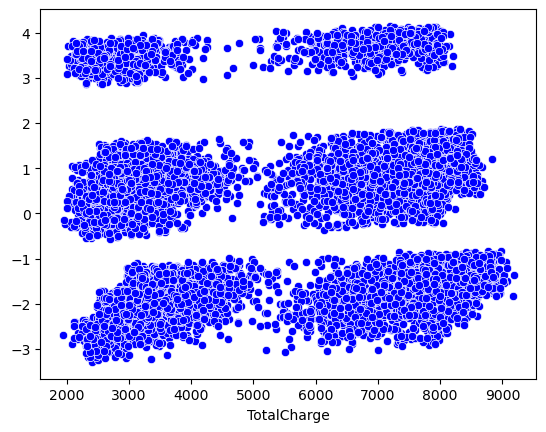

In [193]:
#making the residual plot
med_df['intercept'] = 1
residuals = med_df['Initial_days'] -lm_initialdays_reduced.predict(med_df[['Age', 'Income', 'Initial_admin', 'Complication_risk', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'TotalCharge', 'Additional_charges', 'intercept']])
sns.scatterplot(x=med_df['TotalCharge'],y=residuals,color='blue')
plt.show()
